---

# Exercise 3 ニューラルネットワーク

このコードでは、[ニューラルネットワーク](https://ja.wikipedia.org/wiki/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF)を動かしてみます。

（機械学習の講座ではないので仕組みについては省略）

背景が灰色のセルはプログラムコードが記述されています。
`Shift` + `Enter` で実行してみましょう！

In [1]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

---
# 1. ニューラルネットワークの基本部品

ニューラルネットワークにおいて、入力 $x$ に対するある１つの計算は、重み $w$ とバイアス $b$, 活性化関数 $g$ によって

$$g(\left< w,x \right> + b)$$

と表現できる。

活性化関数は好きに選択してよい。よく使用されるのは
[ReLU](https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%8C%96%E7%B7%9A%E5%BD%A2%E9%96%A2%E6%95%B0), 
[シグモイド関数](https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89#:~:text=%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%EF%BC%88%E8%8B%B1%3A%20sigmoid%EF%BC%89%E3%81%A8,S%E5%AD%97%E5%BD%A2%E3%81%A8%E3%82%82%E3%81%84%E3%81%86%E3%80%82&text=%E7%89%B9%E3%81%AB%E5%90%84%E7%A8%AE%E3%82%B0%E3%83%A9%E3%83%95%E3%81%AB%E7%8F%BE%E3%82%8C%E3%82%8B,%E7%8E%87%EF%BC%89%E3%81%AA%E3%81%A9%E3%81%AB%E8%A6%8B%E3%82%89%E3%82%8C%E3%82%8B%E3%80%82)など。

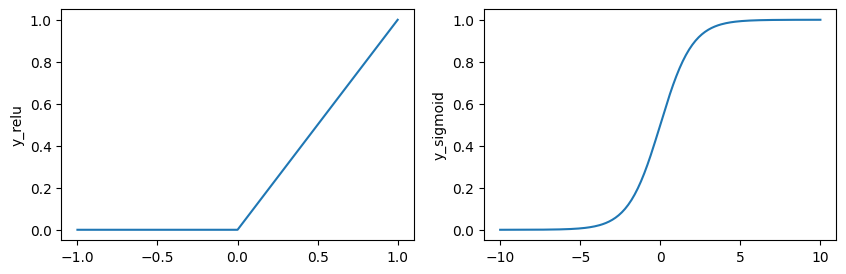

In [2]:
X = np.arange(201) /100 - 1
y_relu = X * (X > 0)
y_sigmoid = 1/(1 + np.exp(-X*10))

fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(X, y_relu)
plt.ylabel('y_relu')
plt.subplot(1,2,2)
plt.plot(X*10, y_sigmoid)
plt.ylabel('y_sigmoid')
plt.show()

---
# 2. LeRUによる二次曲線の近似
次のコードでは、ニューラルネットワークの複雑さを変えながら、LeRuによる二次曲線の学習の様子を観察してみます。

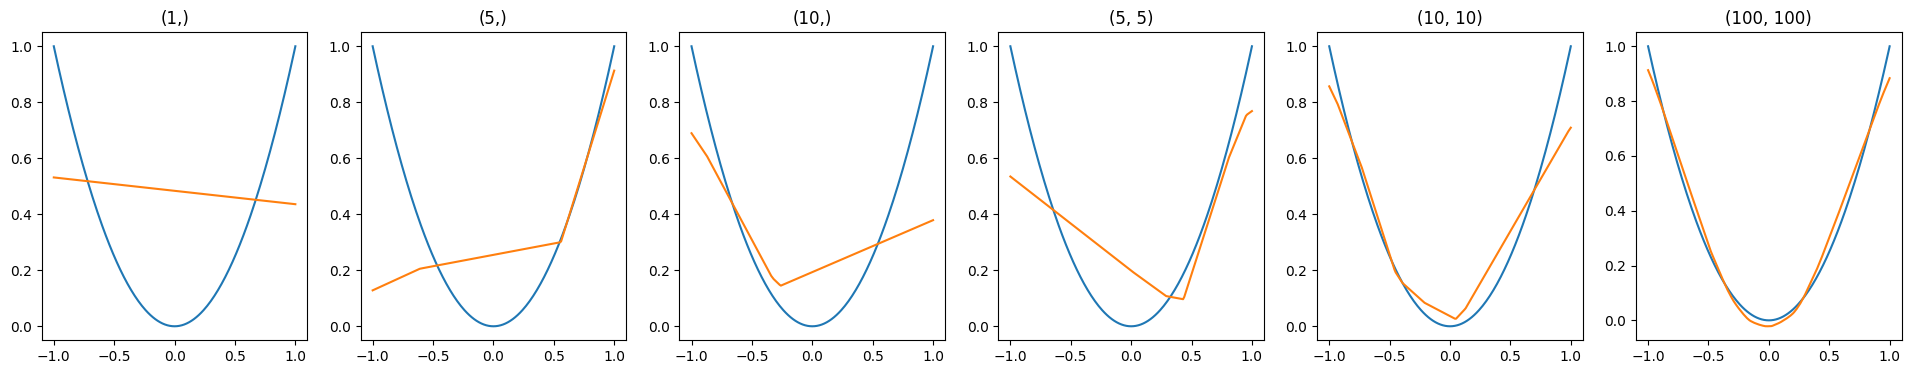

In [3]:
y_square = X**2
fig = plt.figure(figsize=(24,4))
layer_sizes = [(1,), (5, ), (10, ), (5, 5,), (10, 10,), (100,100)]
weights, biases = {}, {}

for i, layer_size in enumerate(layer_sizes):
    clf = MLPRegressor(hidden_layer_sizes= layer_size,
                       activation="relu",
                       max_iter=1000, batch_size=X.shape[0], random_state=42)
    clf.fit(X.reshape(-1,1), y_square)

    weights[layer_size] = [w.shape for w in clf.coefs_]
    biases[layer_size] = [w.shape for w in clf.intercepts_]
    
    plt.subplot(1,len(layer_sizes),i+1)
    plt.plot(X,y_square)
    plt.plot(X,clf.predict(X.reshape(-1,1)))
    plt.title(layer_size)
plt.show()

LeRUは直線的な関数ですが、複雑に組み合わせることで二次曲線を近似し出来ていそうな様子がわかります。

それぞれの複雑さは重みとバイアスの個数($w$の合計次元数、モデルのパラメータ数)で評価されます。

例えば、10次元2層`(10,10)`のときのパラメータ数は、
$$
(1*10 + 10) + (10*10 + 10) + (10*1 +1) = 141
$$
です。

In [4]:
print("===")
display("重み（傾き）の行列のサイズ：", weights)
print("===")
display("バイアス（切片）のベクトルのサイズ：", biases)

===


'重み（傾き）の行列のサイズ：'

{(1,): [(1, 1), (1, 1)],
 (5,): [(1, 5), (5, 1)],
 (10,): [(1, 10), (10, 1)],
 (5, 5): [(1, 5), (5, 5), (5, 1)],
 (10, 10): [(1, 10), (10, 10), (10, 1)],
 (100, 100): [(1, 100), (100, 100), (100, 1)]}

===


'バイアス（切片）のベクトルのサイズ：'

{(1,): [(1,), (1,)],
 (5,): [(5,), (1,)],
 (10,): [(10,), (1,)],
 (5, 5): [(5,), (5,), (1,)],
 (10, 10): [(10,), (10,), (1,)],
 (100, 100): [(100,), (100,), (1,)]}

---
---

### 演習
1. `(100,100)`のときのパラメータ数はいくつか？
2. OpenAIのChatGPTで使用されているGPTモデルシリーズのパラメータ数を調べてみよう。  
   参考：[Wikipedia - GPT (言語モデル)](https://ja.wikipedia.org/wiki/GPT_(%E8%A8%80%E8%AA%9E%E3%83%A2%E3%83%87%E3%83%AB))
3. OpenAIのマルチモーダルモデルCLIPのパラメータ数と、学習に使用されたデータセットの大きさを調べてみよう。  
   参考：[OpenAI CLIP](https://openai.com/index/clip/)